In [238]:
from matplotlib import pyplot as plt
import numpy as np

Modular exponentiation is periodic:


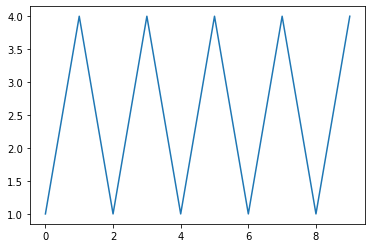

In [239]:
N = 5*3
x = 4

#modular exponentiation
def mod_exp(N,x,r):
    return ((x**r)%N)

print("Modular exponentiation is periodic:")
rs = np.arange(10)
plt.plot(rs, mod_exp(N,x,rs))

The period for x= 4 and N= 15  is:  2


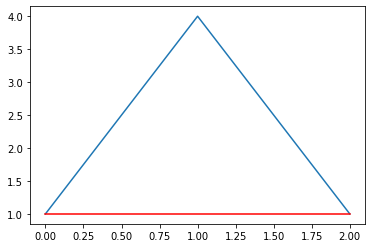

In [240]:
#returns period and x^r mod N across period
def period_finding(N, x):
    
    r=0
    rs=[]
    period=0
    period_found = False
    modular_exp=[]
    
    e = (x**r)%N
    modular_exp.append(e)
    rs.append(r)
    
    while not period_found:
        
        r+=1
        e = (x**r)%N
        modular_exp.append(e)
        rs.append(r)
        if e==1:
            period_found = True
            period = r
        
        
    return period, rs, modular_exp
        
period, rs, e = period_finding(N,x)
print("The period for x=",x ,"and N=", N, " is: ", period)
plt.plot(rs, e)
plt.plot(rs, np.ones(len(rs)), color="red")

## Order finding

We want to find the period of $x^r \pmod{N}$.
The quantum algorithm for order/period finding:

1. choose $l$ such that $N^2 \leq 2^l \leq 2 N^2$ and initialize two registers $Q_1$ and $Q_2$ composed of $l$ qubits each
2. apply $l$ Hadamard gates to obtain superposition of all computational basis states in $Q_1$
3. apply oracle $U_f$, which writes the result of the modular exponentiation into $Q_2$
4. apply the quantum fourier transform (QFT) to $Q_1$
5. measure $Q_1$ saving the result $c$ to a classical register

cite https://arxiv.org/pdf/1202.6614.pdf for hard coded oracle?

These steps conclude the quantum part of the order finding process. Next we need to check the result classically and with a small probability we will have to run the algorithm again, because it returned a wrong result.


The classical part works as follows:

1. compute $r= \frac{q}{\gcd(c,q)}$
2. check $x^r \pmod{N} = 1$ ?
3. on success return period $r$, on failure rerun the algorithm

In [241]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import kraus_error
from qiskit.tools.visualization import plot_histogram

In [242]:
def quantum_fourier_transform(circuit, q):
    n = len(q)
    for i in range(n):
        circuit.h(q[i])
        for k in range(i + 1, n):
            phase = 2.0 * np.pi / (2 ** (k - i + 1))
            circuit.cu1(phase, q[i], q[k])
        circuit.barrier()
    for i in range(n // 2):
        circuit.swap(q[i], q[n - 1 - i])
        
def build_quantum_circuit (x):
    return init + choose_circuit[x] + qft + meas

In [243]:
#factorize 15
N = 15

### 1. choose l and initialize
#N^2 = 225 < 2^8 = 256
l = 8

#create Quantum Registers
q1 = QuantumRegister(8, 'q1')
q2 = QuantumRegister(4, 'q2')

num_qubits = 12

#create Classical Register
c = ClassicalRegister(8, 'c')

#create Quantum Circuit
init = QuantumCircuit(q1, q2, c)

### 2. apply Hadamard gates
init.h(q1)
init.barrier()


### 3. apply oracle
#x=2
u_2 = QuantumCircuit(q1, q2, c)

u_2.x(q1[0])
u_2.x(q1[1])
u_2.ccx(q1[0],q1[1],q2[0])
u_2.x(q1[1])
u_2.x(q1[0])

u_2.x(q1[1])
u_2.ccx(q1[0],q1[1],q2[1])
u_2.x(q1[1])

u_2.x(q1[0])
u_2.ccx(q1[0],q1[1],q2[2])
u_2.x(q1[0])

u_2.ccx(q1[0],q1[1],q2[3])

u_2.barrier()

#x=4
u_4 = QuantumCircuit(q1, q2, c)

u_4.x(q1[0])
u_4.cx(q1[0],q2[0])
u_4.x(q1[0])

u_4.cx(q1[0],q2[2])

u_4.barrier()

#x=7
u_7 = QuantumCircuit(q1, q2, c)

u_7.x(q2[0])
u_7.x(q2[2])

u_7.x(q1[0])
u_7.ccx(q1[0],q1[1],q2[0])
u_7.x(q1[0])

u_7.x(q1[1])
u_7.ccx(q1[0],q1[1],q2[1])
u_7.x(q1[1])

u_7.x(q1[0])
u_7.x(q1[1])
u_7.ccx(q1[0],q1[1],q2[2])
u_7.x(q1[1])
u_7.x(q1[0])

u_7.ccx(q1[0],q1[1],q2[3])

u_7.barrier()

#x=8
u_8 = QuantumCircuit(q1, q2, c)

u_8.x(q1[0])
u_8.x(q1[1])
u_8.ccx(q1[0],q1[1],q2[0])
u_8.x(q1[1])
u_8.x(q1[0])

u_8.ccx(q1[0],q1[1],q2[1])

u_8.x(q1[0])
u_8.ccx(q1[0],q1[1],q2[2])
u_8.x(q1[0])

u_8.x(q1[1])
u_8.ccx(q1[0],q1[1],q2[3])
u_8.x(q1[1])

u_8.barrier()

#x=11
u_11 = QuantumCircuit(q1, q2, c)

u_11.x(q2[0])

u_11.cx(q1[0],q2[1])

u_11.cx(q1[0],q2[3])

u_11.barrier()

#x=13
u_13 = QuantumCircuit(q1, q2, c)

u_13.x(q2[0])

u_13.x(q2[2])

u_13.x(q1[0])
u_13.ccx(q1[0],q1[1],q2[0])
u_13.x(q1[0])

u_13.ccx(q1[0],q1[1],q2[1])

u_13.x(q1[0])
u_13.x(q1[1])
u_13.ccx(q1[0],q1[1],q2[2])
u_13.x(q1[1])
u_13.x(q1[0])

u_13.x(q1[1])
u_13.ccx(q1[0],q1[1],q2[3])
u_13.x(q1[1])

u_13.barrier()

#x=14
u_14 = QuantumCircuit(q1,q2,c)

u_14.x(q1[0])
u_14.cx(q1[0],q2[0])
u_14.x(q1[0])

u_14.cx(q1[0],q2[1])

u_14.cx(q1[0],q2[2])

u_14.cx(q1[0],q2[3])

u_14.barrier()


### 4. apply QFT (use sample solution for arbitrary number of qubits)

qft = QuantumCircuit(q1)
quantum_fourier_transform(qft, q1)


### 5. measure Register q1

meas = QuantumCircuit(q1, c)
meas.measure(q1, c)

#Create dictionary to allow for random x

choose_circuit = {2: u_2, 4: u_4, 7: u_7, 8: u_8, 11: u_11, 13: u_13, 14: u_14}

### Choose suitable x for order finding
def choose_x():
    #chose random x between 1 < x < N and calculate gcd(x,N)
    gcd = 0
    while gcd != 1:

        x = np.random.randint(2,N-1)
        gcd = np.gcd(x, N)
    
    print("Order finding for x = ", x)
    return x

Firstly we will check whether the quantum circuit and consequently the algorithm runs correctly on the simulator backend without noise. The procedure will be as follows:

    1. Simulator without noise
    2. real IBMQ device
    3. Simulator with noise
    
## 1. Simulator without noise

Order finding for x =  8
The expected period for x= 8 and N= 15  is:  4


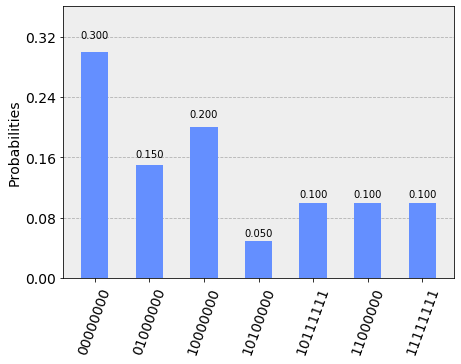

In [244]:
### Build Circuit
x = choose_x()
period, rs, e = period_finding(N,x)
print("The expected period for x=",x ,"and N=", N, " is: ", period)
complete_circuit = build_quantum_circuit(x)


#Draw it because it looks nice
complete_circuit.draw(output = 'mpl')


#quantum Shor is a probabilistic algorithm, so we run it several times to be sure
shots = 20

backend = Aer.get_backend('qasm_simulator')
job = execute(complete_circuit, backend, shots=shots)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [245]:
#find the highest contribution and find decimal representation
def find_cs(counts):
    cs = []
    count = []
    for y, z in counts.items():
        c = int(y, 2)

        
        cs.append(c)
        count.append(z)
            
    cs = np.asarray(cs)[np.argsort(count)]        
    count = np.asarray(count)[np.argsort(count)]    
    return np.flip(cs), np.flip(count)

#find period from quantum measurements saved in counts
def find_quantum_period(counts):
    cs, count = find_cs(counts)
    period, rs, e = period_finding(N,x)
    print("The expected period for x=",x ,"and N=", N, " is: ", period)
    period_found = False
    i=0

    while not period_found:
        ### calculate r by 2^l/gcd(c, 2^l)
        r = 2**l/np.gcd(cs[i], 2**l)
        print("candidate r = ", r)

        if r==period:
            period_found = True

        i = i+1

    print("found period r = ", r)
    return r
        
#calculate possible prime factors, from order r
def prime_candidates(r):
    prime1 = np.gcd(x**(int(r/2))-1, N)
    prime2 = np.gcd(x**(int(r/2))+1, N)

    print("First prime: ", prime1,"Second prime:", prime2)
    return prime1, prime2

In [246]:
### Check the algorithm for all possible values of x
xs = [2,4,7,8,11,13,14]

for x in xs:
    
    ### 1. run quantum circuit
    complete_circuit = build_quantum_circuit(x)

    #quantum Shor is a probabilistic algorithm, so we run it several times to be sure
    shots = 20

    backend = Aer.get_backend('qasm_simulator')
    job = execute(complete_circuit, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    ### 2. find order
    r = find_quantum_period(counts)
    
    ### 3. print prime candidates
    p1, p2 = prime_candidates(r)

The expected period for x= 2 and N= 15  is:  4
candidate r =  256.0
candidate r =  2.0
candidate r =  4.0
found period r =  4.0
First prime:  3 Second prime: 5
The expected period for x= 4 and N= 15  is:  2
candidate r =  1.0
candidate r =  256.0
candidate r =  2.0
found period r =  2.0
First prime:  3 Second prime: 5
The expected period for x= 7 and N= 15  is:  4
candidate r =  1.0
candidate r =  2.0
candidate r =  4.0
found period r =  4.0
First prime:  3 Second prime: 5
The expected period for x= 8 and N= 15  is:  4
candidate r =  1.0
candidate r =  2.0
candidate r =  256.0
candidate r =  4.0
found period r =  4.0
First prime:  3 Second prime: 5
The expected period for x= 11 and N= 15  is:  2
candidate r =  1.0
candidate r =  2.0
found period r =  2.0
First prime:  5 Second prime: 3
The expected period for x= 13 and N= 15  is:  4
candidate r =  2.0
candidate r =  256.0
candidate r =  256.0
candidate r =  1.0
candidate r =  4.0
found period r =  4.0
First prime:  3 Second prime: 5
Th

As we can see the algorithm runs correctly on a simulator without noise. We will now move on to the IBMQ device.

## 2. Real IBMQ Device

In [247]:
from qiskit import IBMQ

In [232]:
#IBMQ.enable_account('f6a038b8c69bb67a73957939a73ef68aca2a7f80c4e123482d089fe2c2ee7de9054fa0106068d56d4bc01e7df71c4fc8c3bc888171a41033f62168c8b4b1bbc9')

C:\Users\Alexander\Anaconda3\envs\qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [249]:
IBMQ.load_accounts()

In [250]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]

In [251]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits > num_qubits and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [252]:
#build the circuit for a random x (out of the sensible values for x)
x = choose_x()
period, rs, e = period_finding(N,x)
print("The expected period for x=",x ,"and N=", N, " is: ", period)
complete_circuit = build_quantum_circuit(x)

shots = 20

job_sim = execute(complete_circuit, backend=backend, shots=shots)

Order finding for x =  8
The expected period for x= 8 and N= 15  is:  4


In [253]:
# Grab the results from the job.
result = job_sim.result()

counts = result.get_counts()

plot_histogram(counts)

KeyboardInterrupt: 

In [130]:
#find order
r = find_quantum_period(counts)

#print prime candidates
p1, p2 = prime_candidates(r)

2.0
3 1


describe results from IBMQ...

## 3. Simulator with Noise

We will use a simple noise model, that is closely related to the actual noise occuring in IBMQ devices such as the "ibmq_16_melbourne" backend (which we used in the previous step under 2.). It suffices to define the noise model for the basis gates, see below.

In [ ]:
# List of gate times for ibmq_14_melbourne device
# Note that the None parameter for u1, u2, u3 is because gate
# times are the same for all qubits
gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

# Construct the noise model from backend properties
# and custom gate times
noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)
print(noise_model)


In [ ]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with depolarizing noise model")


In the following a different approach: Noise only on one-qubit gates (just as in the exercises)

In [56]:
gate_time = 1.0

# Custom noise model with amplitude damping
t1 = 0.1
gamma = 1.0 - np.exp(-gate_time / t1)

# create noise model object
noise_model = NoiseModel()
# create quantum error object from Kraus operators k0 and k1
k0 = np.asarray([[1.0, 0.0], [0.0, np.sqrt(1.0 - gamma)]])
k1 = np.asarray([[0.0, np.sqrt(gamma)], [0.0, 0.0]])
error = kraus_error([k0, k1])
# add the quantum error for the identity gate and qubit 0 to the noise model

#all the one-qubit gates we are using
gates = ['x', 'h'] #all the gates we are using ['x', 'cx', 'ccx', 'h', 'swap', 'cu1']

for i in range(num_qubits):
    
    for gate in gates:
        
        noise_model.add_quantum_error(error, gate, [i])

#noise_model.add_quantum_error(error, 'h', [1])
# the noise_model option requires the backend Aer instead of BasicAer
backend = Aer.get_backend('qasm_simulator')
# simulate a list of quantum circuits using the custom noise model
job = execute(complete_circuit, backend, shots=shots, noise_model=noise_model)
result = job.result()


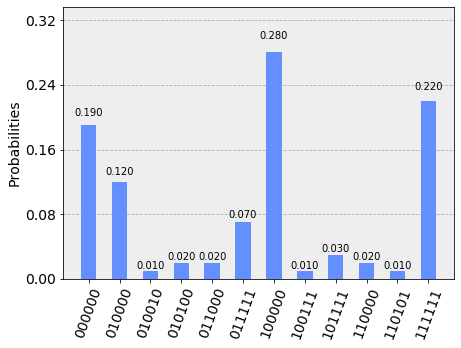

In [57]:
counts = result.get_counts(complete_circuit)
plot_histogram(counts)

In [31]:
n1 = np.fromiter((result.get_counts(i).get('1', 0) for i in range(len(complete_circuit))), dtype=np.int)

prob1 = n1 / shots
prob1_err = np.sqrt(prob1 * (1.0 - prob1) / shots)

# The optimizer scipy.optimize.curve_fit does not work if some errors are exactly zero.
# Therefore, replace all zeros with the minimal error corresponding to the error of a single detection.
prob1_err[prob1_err == 0.0] = np.sqrt((1 / shots) * (1.0 - (1 / shots)) / shots)

print(prob1)
print(prob1_err)

IndexError: list index out of range